In [1]:
import pandas as pd
import numpy as npy
import seaborn as sborn
from sklearn.datasets import make_moons

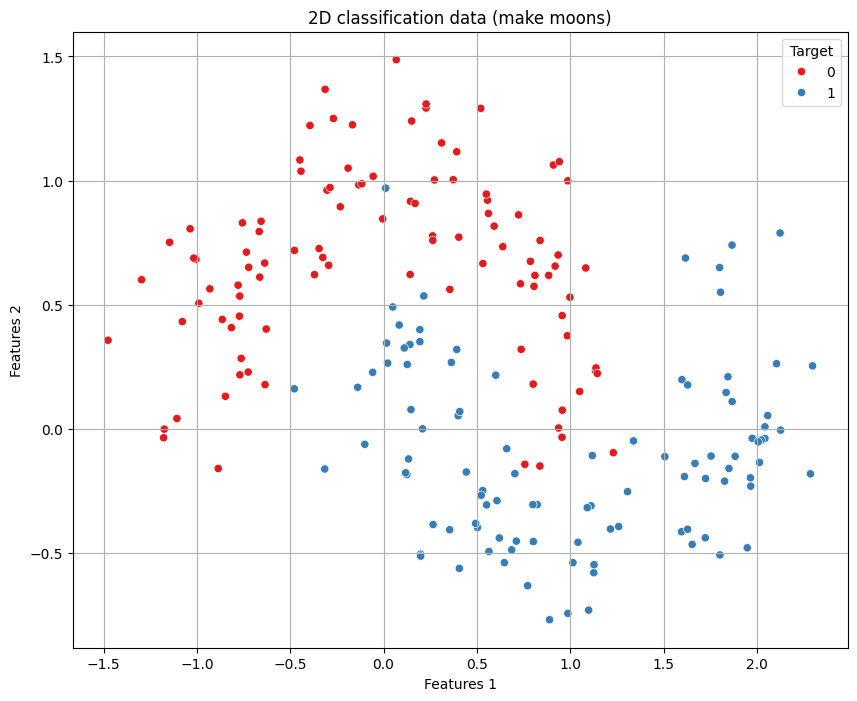

In [3]:
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

df = pd.DataFrame(X, columns=["Features 1", "Features 2"])
df["Target"] = y

plt.figure(figsize=(10, 8))
sborn.scatterplot(data=df, x='Features 1', y='Features 2', hue='Target', palette='Set1')
plt.title("2D classification data (make moons)")
plt.grid(True)
plt.show()

**2. Train-Test Split and Normalization**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
  x_scaled, y, test_size=0.3, random_state=42, stratify=y
)

**3. Fit the k-NN Model and Evaluate**

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=5): 0.98


**4. Cross-Validation to Choose Best k**

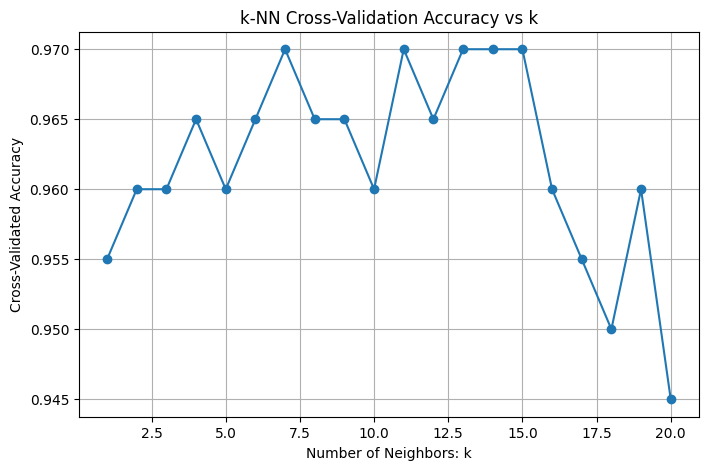

Best k from cross-validation: 7


In [7]:
import numpy as np
from sklearn.model_selection import cross_val_score

k_range = range(1, 21)
cv_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, x_scaled, y, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

**5. Training with Best k**

In [8]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

**6. Evaluate Using More Metrics**

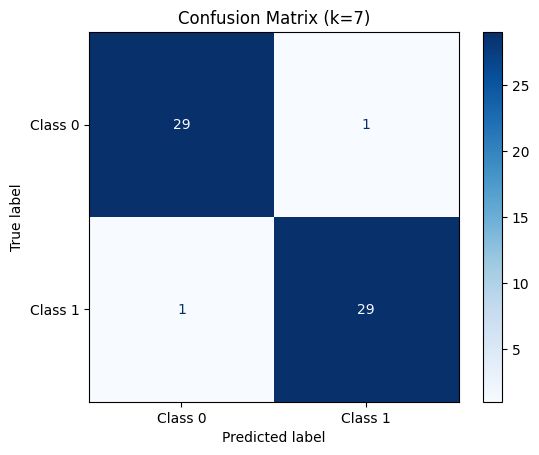

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.97      0.97        30
     Class 1       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

**7. Visualize Decision Boundary with Best k**

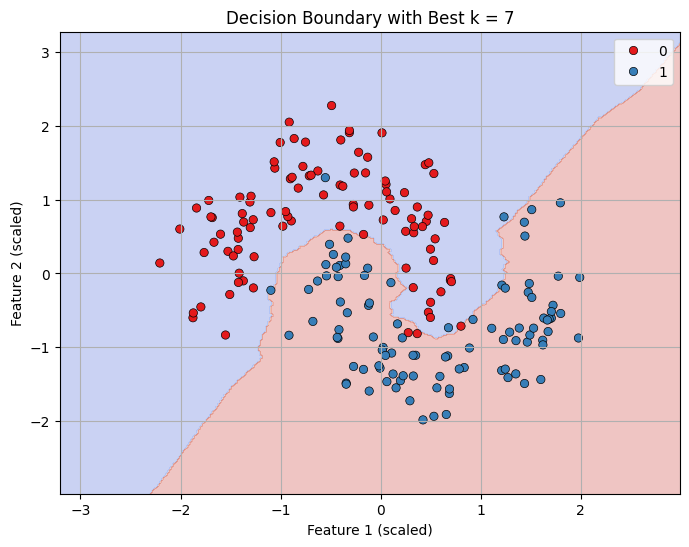

In [10]:
# Create mesh grid
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
# Predict on mesh grid with best k
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sborn.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=y, palette="Set1", edgecolor='k')
plt.title(f"Decision Boundary with Best k = {best_k}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()